In [2]:
# library imports
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 


In [3]:

# load datasets

print("Loading MNIST dataset...")

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training samples:", x_train.shape[0])
print("Test samples:", x_test.shape[0])



Loading MNIST dataset...
Training samples: 60000
Test samples: 10000


In [4]:
#  3. DATA PREPROCESSING 
# Reshape images from 28x28 → 784 vector
x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)
# In reshape, -1 tells NumPy to automatically compute that dimension based on total elements and the other specified dimension.

# Normalize pixel values to range [0,1]
x_train = x_train / 255.0
x_test  = x_test / 255.0

print("After reshaping:", x_train.shape)



After reshaping: (60000, 784)


In [5]:
#  4. BUILD MLP MODEL 
print("\nBuilding MLP model...")

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),   # Hidden layer
    Dense(64, activation='relu'),                        # Extra hidden layer
    Dense(10, activation='softmax')                      # Output layer
])

model.summary()



Building MLP model...


c:\Users\mishr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 5. COMPILE MODEL 

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel compiled successfully.")



Model compiled successfully.


In [7]:
#  6. TRAIN MODEL 

print("\nTraining model...")

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)



Training model...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9249 - loss: 0.2561 - val_accuracy: 0.9678 - val_loss: 0.1099
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9667 - loss: 0.1058 - val_accuracy: 0.9735 - val_loss: 0.0885
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9767 - loss: 0.0747 - val_accuracy: 0.9718 - val_loss: 0.0958
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9821 - loss: 0.0577 - val_accuracy: 0.9723 - val_loss: 0.1032
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9849 - loss: 0.0464 - val_accuracy: 0.9795 - val_loss: 0.0777
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9875 - loss: 0.0388 - val_accuracy: 0.9735 - val_loss: 0.1021
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.9787 - val_loss: 0.0928
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accurac

In [8]:
# 7. EVALUATE MODEL

print("\nEvaluating on test data...")

test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")




Evaluating on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9782 - loss: 0.0939

Test Loss: 0.0939
Test Accuracy: 0.9782



Plotting training graphs...


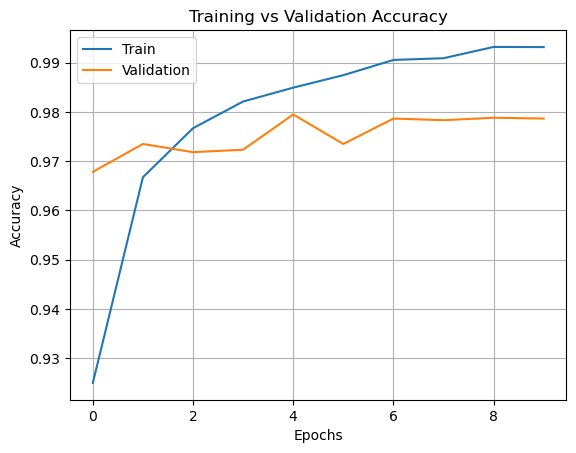

In [9]:
# 8. VISUALIZATION 

print("\nPlotting training graphs...")

# Accuracy Plot
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()


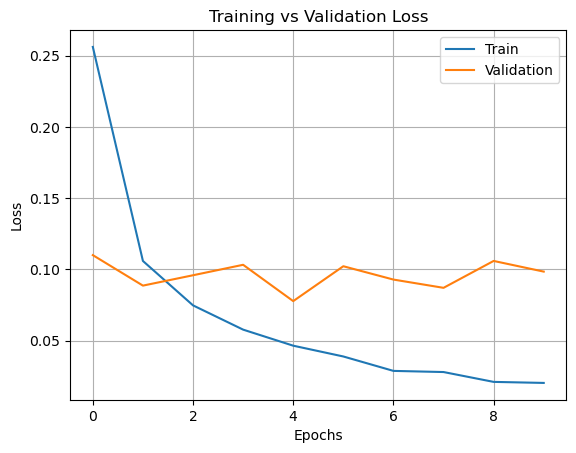

In [10]:

# Loss Plot
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()

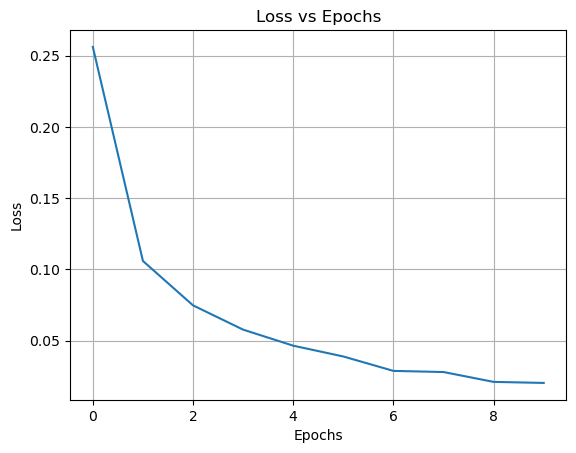

In [11]:
# Loss vs Epochs 
plt.figure()
plt.plot(history.history['loss'])
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()


In [12]:
# 9. SAMPLE PREDICTIONS

print("\nShowing sample predictions...")

predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted:", predicted_labels)
print("Actual   :", y_test[:5])




Showing sample predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Predicted: [7 2 1 0 4]
Actual   : [7 2 1 0 4]
